In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI/iris_dataa.csv" , header=None)

In [ ]:
df.shape

(150, 5)

In [ ]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
df_x = df.iloc[:,:-1]
df_y = df.iloc[:,-1]

In [ ]:
labels = np.array([df_y]).reshape(-1, 1)
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_y = one_hot_encoder.fit_transform(labels)
encoded_y = encoded_y.argmax(axis=1)

In [ ]:
scaler = StandardScaler()
x_nrm = scaler.fit_transform(df_x)
y = encoded_y.flatten()


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df_x , y , train_size=0.8)

In [ ]:
y_train_ctg = to_categorical(y_train)
y_test_ctg  = to_categorical(y_test)

In [ ]:
print(y_train_ctg.shape)
print(x_train.shape)

(120, 3)
(120, 4)


In [ ]:
model = Sequential()
model.add(Dense(64 , activation="relu" , input_shape=x_train.shape[1:]))
model.add(Dense(32 , activation="relu"))
model.add(Dense(y_test_ctg.shape[1] , activation="softmax"))
model.compile(loss="categorical_crossentropy")
print(model.summary())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
results = model.fit(x_train , y_train_ctg , epochs=20 , validation_data=(x_test,y_test_ctg))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0723 - val_loss: 1.1329
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0690 - val_loss: 1.1601
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0812 - val_loss: 1.1898
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0701 - val_loss: 1.1700
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0844 - val_loss: 1.1627
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0945 - val_loss: 1.1425
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0834 - val_loss: 1.1631
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0770 - val_loss: 1.1445
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0710 - val_loss: 1.1733
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0895 - val_loss: 1.1775
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0948 - val_loss: 1.1812
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0583 - val_loss: 1.1585
E

In [ ]:
yhat_train = model.predict(x_train).round()
yhat_test  = model.predict(x_test).round()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [ ]:
print(cr(y_train_ctg , yhat_train))

              precision    recall  f1-score   support

           0       1.00      0.09      0.17        43
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00        38

   micro avg       1.00      0.03      0.06       120
   macro avg       0.33      0.03      0.06       120
weighted avg       0.36      0.03      0.06       120
 samples avg       0.03      0.03      0.03       120



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(cr(y_test_ctg , yhat_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        12

   micro avg       0.00      0.00      0.00        30
   macro avg       0.00      0.00      0.00        30
weighted avg       0.00      0.00      0.00        30
 samples avg       0.00      0.00      0.00        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


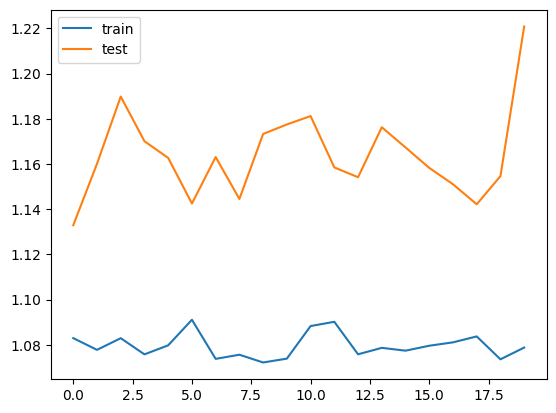

In [ ]:
plt.plot(results.history["loss"] , label="train")
plt.plot(results.history["val_loss"] , label="test")
plt.legend()